<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


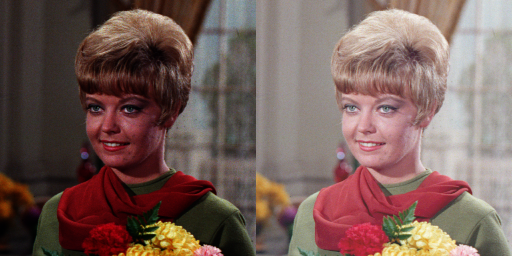

In [ ]:
def adjust_gamma(image, gamma=1.0):
    # Buat lookup table untuk semua nilai piksel (0-255)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Terapkan gamma correction menggunakan lookup table
    return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('-----------------------------')

# Input nilai gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, Nilai Gamma harus berupa angka.')
    exit()

# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Terapkan Gamma Correction
gamma_image = adjust_gamma(image, gamma=gamma)

# Tampilkan gambar asli dan gambar setelah gamma correction
final_frame1 = cv.hconcat((image, gamma_image))
cv2_imshow(final_frame1)

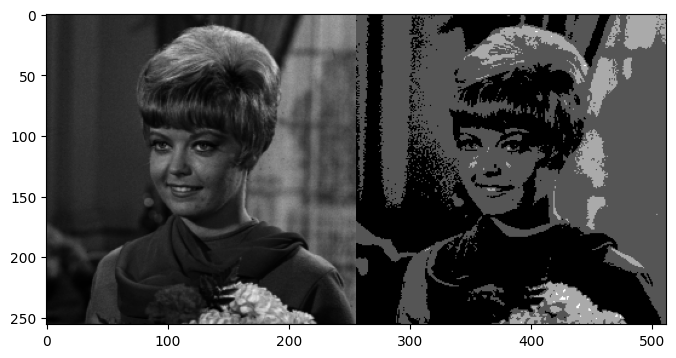

In [ ]:
# Parameter bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Memuat gambar grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff', cv.IMREAD_GRAYSCALE)

# Buat citra baru untuk bit depth yang lebih rendah
depth_image = np.zeros(original.shape, original.dtype)

# Menerapkan quantisasi bit depth
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = np.round(original[i, j] / level) * level

# Menampilkan gambar asli dan hasil
final_frame2 = cv.hconcat((original, depth_image))
plt.figure(figsize=(8, 16))
plt.imshow(final_frame2, cmap='gray')

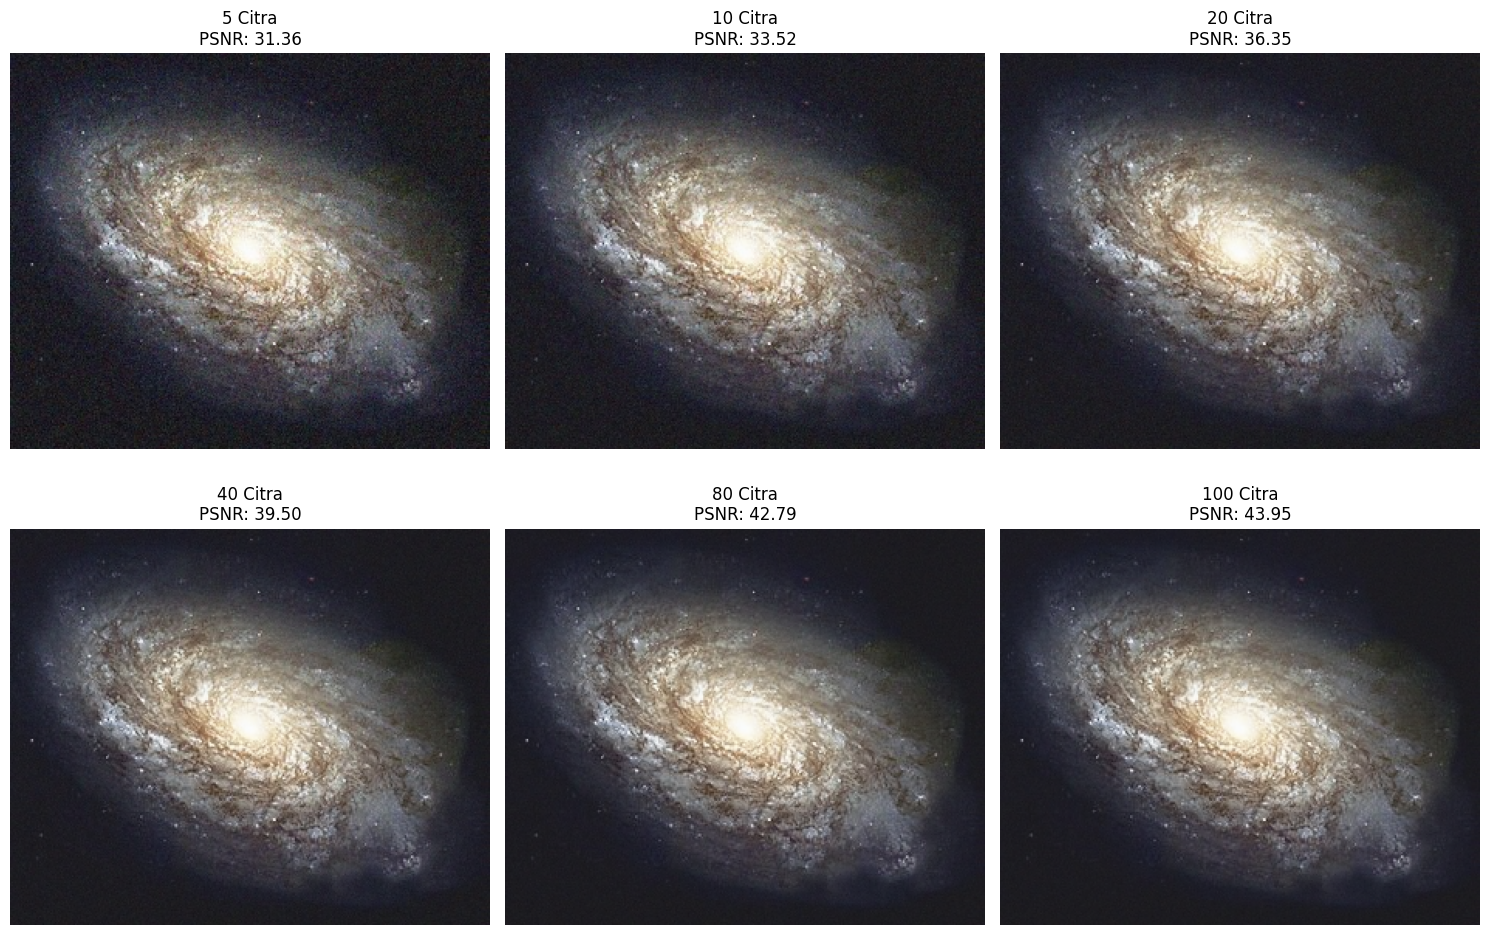

In [ ]:
# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio)
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 berarti tidak ada noise sama sekali
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Gambar asli
galaxy = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')

# Memuat semua gambar berwarna ke dalam daftar
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/image/noises/*.jpg'):
    n = cv.imread(img)  # Memuat gambar dalam format RGB
    cv_img.append(n)

# List untuk menyimpan hasil gambar denoised
denoised_img = []

# List untuk menyimpan PSNR
psnr_values = []

# Melakukan denoising berdasarkan rata-rata pada gambar dari cv_img[0] sampai cv_img[99]
average_counts = [5, 10, 20, 40, 80, 100]  # Jumlah rata-rata yang ingin digunakan

plt.figure(figsize=(15, 10))  # Ukuran gambar yang lebih besar

for idx, count in enumerate(average_counts):
    if count <= len(cv_img):
        # Rata-rata untuk denoising
        denoised_image = np.zeros_like(cv_img[0], dtype=np.float32)
        for i in range(count):
            denoised_image += cv_img[i].astype(np.float32)

        denoised_image /= count
        denoised_image = np.uint8(denoised_image)  # Konversi ke uint8

        # Menghitung PSNR antara gambar asli dan gambar hasil denoising
        # Kita bandingkan dengan gambar noise asli (bukan yang dinoising sebelumnya)
        psnr_value = PSNR(galaxy, denoised_image)
        psnr_values.append(psnr_value)

        # Menyimpan hasil gambar denoised
        denoised_img.append(denoised_image)

        # Menampilkan gambar hasil denoising
        plt.subplot(2, 3, idx + 1)
        plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
        plt.title(f'{count} Citra\nPSNR: {psnr_value:.2f}')
        plt.axis('off')
    else:
        print(f'Not enough images for {count} average.')

plt.tight_layout()
plt.show()

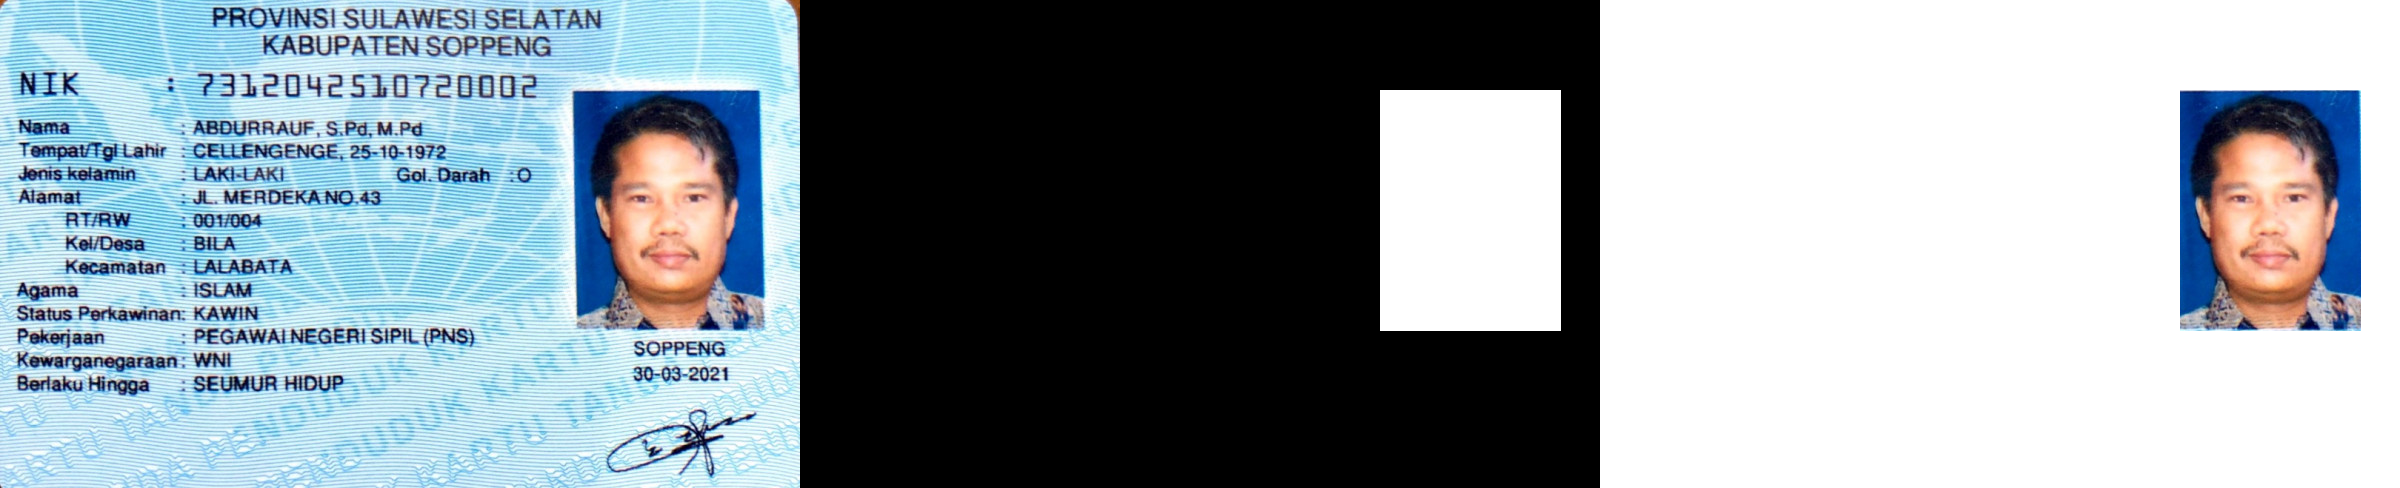

In [ ]:
# Membaca citra
ktp = cv.imread('/content/drive/MyDrive/PCVK/image/KTP7.jpeg')

# Membuat mask berwarna hitam
mask = np.zeros(ktp.shape, ktp.dtype)

# maks berbentuk kotak
top_left = (580, 90)  # Koordinat sudut kiri atas
bottom_right = (760, 330)  # Koordinat sudut kanan bawah
cv.rectangle(mask, top_left, bottom_right, color=(255, 255, 255), thickness=cv.FILLED)

# Melakukan operasi masking menggunakan operator AND
masked = cv.bitwise_and(ktp, mask)

# Membuat latar belakang putih
whitebg = np.full(ktp.shape, 255, ktp.dtype)

# Mengatur hasil akhir: area yang ter-mask diisi dengan gambar asli, sisanya putih
res = np.where(mask != 0, masked, whitebg)

# Menggabungkan gambar asli, mask, dan hasil akhir
final_frame = cv.hconcat((ktp, mask, res))
cv2_imshow(final_frame)

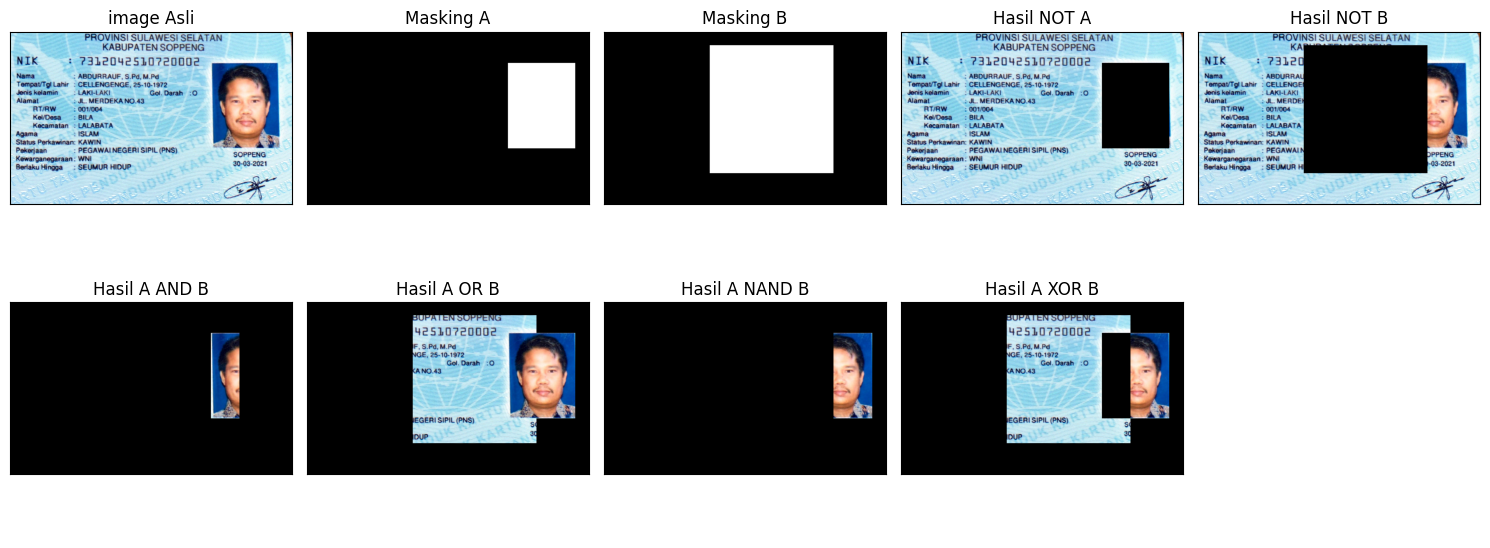

In [ ]:
# Membaca citra
ktp = cv.imread('/content/drive/MyDrive/PCVK/image/KTP7.jpeg')

# Membuat mask berwarna hitam
maskA = np.zeros(ktp.shape, ktp.dtype)
maskB = np.zeros(ktp.shape, ktp.dtype)

# Masking A
top_left_a = (570, 90)  # Koordinat sudut kiri atas
bottom_right_a = (760, 330)  # Koordinat sudut kanan bawah
cv.rectangle(maskA, top_left_a, bottom_right_a, color=(255, 255, 255), thickness=cv.FILLED)

# Masking B
top_left_b = (300, 40)  # Koordinat sudut kiri atas
bottom_right_b = (650, 400)  # Koordinat sudut kanan bawah
cv.rectangle(maskB, top_left_b, bottom_right_b, color=(255, 255, 255), thickness=cv.FILLED)

# Menggunakan operator logika
and_mask = cv.bitwise_and(maskA, maskB)
or_mask = cv.bitwise_or(maskA, maskB)
nand_mask = cv.bitwise_and(maskA, cv.bitwise_not(maskB))
xor_mask = cv.bitwise_xor(maskA, maskB)
not_a = cv.bitwise_not(maskA)
not_b = cv.bitwise_not(maskB)

# hasil Masking
and_result = cv.bitwise_and(ktp, and_mask)
or_result = cv.bitwise_and(ktp, or_mask)
nand_result = cv.bitwise_and(ktp, nand_mask)
xor_result = cv.bitwise_and(ktp, xor_mask)
notA_result = cv.bitwise_and(ktp, not_a)
notB_result = cv.bitwise_and(ktp, not_b)


# Menampilkan hasil
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes[0, 0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
axes[0, 0].set_title('image Asli')
axes[0, 1].imshow(cv.cvtColor(maskA, cv.COLOR_BGR2RGB))
axes[0, 1].set_title('Masking A')
axes[0, 2].imshow(cv.cvtColor(maskB, cv.COLOR_BGR2RGB))
axes[0, 2].set_title('Masking B')
axes[0, 3].imshow(cv.cvtColor(notA_result, cv.COLOR_BGR2RGB))
axes[0, 3].set_title('Hasil NOT A')
axes[0, 4].imshow(cv.cvtColor(notB_result, cv.COLOR_BGR2RGB))
axes[0, 4].set_title('Hasil NOT B')
axes[1, 0].imshow(cv.cvtColor(and_result, cv.COLOR_BGR2RGB))
axes[1, 0].set_title('Hasil A AND B')
axes[1, 1].imshow(cv.cvtColor(or_result, cv.COLOR_BGR2RGB))
axes[1, 1].set_title('Hasil A OR B')
axes[1, 2].imshow(cv.cvtColor(nand_result, cv.COLOR_BGR2RGB))
axes[1, 2].set_title('Hasil A NAND B')
axes[1, 3].imshow(cv.cvtColor(xor_result, cv.COLOR_BGR2RGB))
axes[1, 3].set_title('Hasil A XOR B')
axes[1, 4].axis('off')

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()